# Data Preprocessing & EDA


## Preparing Library & Dataset

In [1]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.9 MB/s eta 0:00:00


In [2]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 76.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
pip install spacy-language-detection

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=daaefa8b2fbf3d838332003c1fe817fcad259e0dd23f5bd7cd2302f03762109b
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
import nltk
import contractions
import matplotlib.pyplot as plt
import spacy
from spacy.language import Language  
from spacy_language_detection import LanguageDetector
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import MWETokenizer, word_tokenize
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

df = pd.read_csv('/kaggle/input/books-dataset-goodreadsmay-2024/Book_Details.csv',index_col = 'book_title')
df.head()

,Unnamed: 0,book_id,cover_image_uri,book_details,format,publication_info,authorlink,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_distribution
book_title,,,,,,,,,,,,,,
Harry Potter and the Half-Blood Prince,0,1,https://images-na.ssl-images-amazon.com/images...,"It is the middle of the summer, but there is a...","['652 pages, Paperback']","['First published July 16, 2005']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['652'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8..."
Harry Potter and the Order of the Phoenix,1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter is about to start his fifth year ...,"['912 pages, Paperback']","['First published June 21, 2003']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['912'],"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2..."
Harry Potter and the Sorcerer's Stone,2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter has no idea how famous he is. Tha...,"['309 pages, Hardcover']","['First published June 26, 1997']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['309'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",10116247,163493,4.47,"{'5': '6,544,542', '4': '2,348,390', '3': '856..."
Harry Potter and the Prisoner of Azkaban,3,5,https://images-na.ssl-images-amazon.com/images...,"Harry Potter, along with his best friends, Ron...","['435 pages, Mass Market Paperback']","['First published July 8, 1999']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['435'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4215031,84959,4.58,"{'5': '2,892,322', '4': '970,190', '3': '287,7..."
Harry Potter and the Goblet of Fire,4,6,https://images-na.ssl-images-amazon.com/images...,It is the summer holidays and soon Harry Potte...,"['734 pages, Paperback']","['First published July 8, 2000']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['734'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3718209,69961,4.57,"{'5': '2,500,070', '4': '899,496', '3': '259,7..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16225 entries, Harry Potter and the Half-Blood Prince to Shadow's Siege
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           16225 non-null  int64  
 1   book_id              16225 non-null  int64  
 2   cover_image_uri      16225 non-null  object 
 3   book_details         16177 non-null  object 
 4   format               16225 non-null  object 
 5   publication_info     16225 non-null  object 
 6   authorlink           16225 non-null  object 
 7   author               16225 non-null  object 
 8   num_pages            16225 non-null  object 
 9   genres               16225 non-null  object 
 10  num_ratings          16225 non-null  int64  
 11  num_reviews          16225 non-null  int64  
 12  average_rating       16225 non-null  float64
 13  rating_distribution  16225 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usa

In [6]:
df.describe()

,Unnamed: 0,book_id,num_ratings,num_reviews,average_rating
count,16225.000000,1.622500e+04,1.622500e+04,16225.000000,16225.000000
mean,8112.000000,1.038704e+07,8.578453e+04,5156.269584,4.002499
std,4683.898394,2.146809e+07,3.202513e+05,15776.459696,0.336102
min,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,4056.000000,9.403400e+04,2.950000e+03,205.000000,3.830000
50%,8112.000000,9.440730e+05,1.623200e+04,993.000000,4.030000
75%,12168.000000,1.128490e+07,5.594400e+04,3457.000000,4.210000
max,16224.000000,2.096076e+08,1.011625e+07,274695.000000,5.000000


In [7]:
df.shape

(16225, 14)

In [8]:
df.isna().sum()

Unnamed: 0              0
book_id                 0
cover_image_uri         0
book_details           48
format                  0
publication_info        0
authorlink              0
author                  0
num_pages               0
genres                  0
num_ratings             0
num_reviews             0
average_rating          0
rating_distribution     0
dtype: int64

## Data Preprocessing

In [9]:
# drop null columns
df = df.dropna()

#separate generated list of genres
df['genres'] = df['genres'].str.strip('[]').str.split(',').apply(lambda x: [i.strip().strip("'") for i in x])

In [10]:
#one hot encoding book's category
list_genres_5 = ['Fantasy', 'Young Adult', 'Classics', 'Romance', 'Historical Fiction']

for genre in list_genres_5:
    df[genre] = df['genres'].apply(lambda x: genre in x)

In [11]:
# filtering columns of the dataset 
df = df.loc[df['genres'].apply(lambda x: 'Fiction' in x),['book_details',*list_genres_5]]
df.head()

,book_details,Fantasy,Young Adult,Classics,Romance,Historical Fiction
book_title,,,,,,
Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",True,True,False,False,False
Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,False,True,False,False,False
Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,True,True,False,False,False
Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...",True,True,False,False,False
Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,True,True,False,False,False


## Cleaning Text

In [12]:
cleaned_df = df.copy()

In [13]:
# clear the contractions
def expand_contractions(x):
    return ' '.join([contractions.fix(word) for word in x.split() ])

punctuation = string.punctuation+'“'+'’'

cleaned_df['book_details'] = cleaned_df['book_details'].str.lower() # lower case text
cleaned_df['book_details'] = cleaned_df['book_details'].apply(lambda x : expand_contractions(x)) # expanding contractions
cleaned_df['book_details'] = cleaned_df['book_details'].apply(lambda x: re.sub(r'\d+', '', x))  # clearing number
cleaned_df['book_details'] = cleaned_df['book_details'].apply(lambda x: re.sub(r'[^\w\s]+', ' ', x))  # clear special character
cleaned_df['book_details'] = cleaned_df['book_details'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())  # clear multiple whitespace
cleaned_df['book_details'] = cleaned_df['book_details'].apply(lambda x : ' '.join([word for word in x.split() if word not in  ['s','','isbn']])) # clear unneccessary word

In [14]:
# tokenization
def tokenize_text(text):
    tokenizer = MWETokenizer(separator=' ')
    tokens = tokenizer.tokenize(word_tokenize(text))
    return tokens

cleaned_df['book_details'] = cleaned_df['book_details'].apply(tokenize_text)

In [15]:
# remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

cleaned_df['book_details'] = cleaned_df['book_details'].apply(remove_stopwords)

In [17]:
#lemmatize token
def lemmatize_tokens(tokens):
    tokens_str = nlp_model(' '.join(tokens))
    tokens_li = [word for word in tokens_str]
    return " ".join([token.lemma_ for token in tokens_li])

cleaned_df['book_details'] = cleaned_df['book_details'].apply(lambda x : lemmatize_tokens(x))

In [16]:
# preparing language detector
nlp_model = spacy.load("en_core_web_sm")

def get_lang_detector(nlp, name):
    return LanguageDetector(seed=42)

Language.factory("language_detector_1", func=get_lang_detector)
nlp_model.add_pipe('language_detector_1', last=True)

In [18]:
# checking language of description
def check_language(x):
    doc = nlp_model(x)
    detect_language = doc._.language  
    return detect_language['language'] == 'en'

cleaned_df['english_language'] = cleaned_df['book_details'].apply(lambda x: check_language(x))

In [19]:
cleaned_df['english_language'].value_counts()

english_language
True     10833
False      607
Name: count, dtype: int64

In [22]:
# filter description based on english language
cleaned_df = cleaned_df[cleaned_df['english_language']].drop(columns = 'english_language')

# EDA

In [23]:
df.shape

(11440, 6)

<Axes: title={'center': 'Label Genre'}>

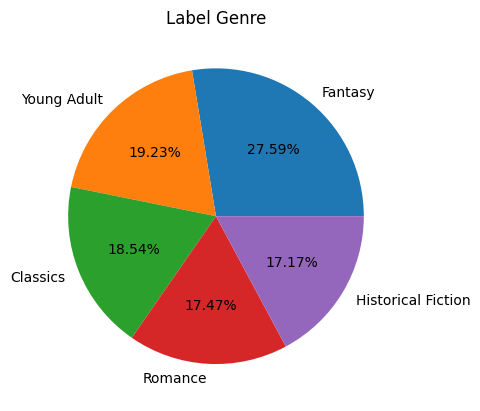

In [24]:
# display the proportion of categories
label_cols = ['Fantasy','Young Adult','Classics','Romance','Historical Fiction']
df[label_cols].sum().plot(kind = 'pie', autopct = '%.2f%%', title = 'Label Genre')

<Axes: title={'center': "Book's label counts"}>

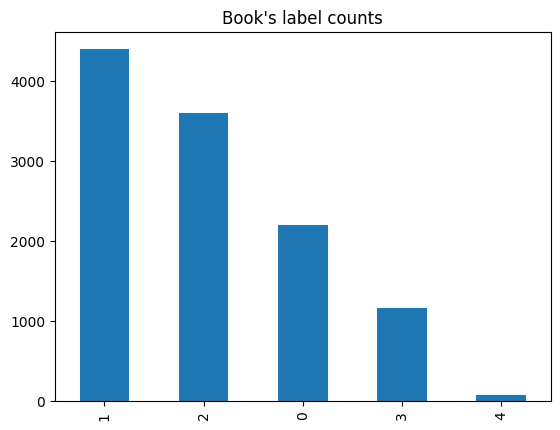

In [25]:
# displaying the proportion of book's total labels
df[label_cols].sum(axis = 1).value_counts().plot(kind = 'bar', title = 'Book\'s label counts' )

## Data split

In [33]:
train , val = train_test_split(cleaned_df,test_size=0.10,random_state=42)

In [34]:
train.to_csv('train.csv')
val.to_csv('val.csv')